In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [5]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    x_test = x[k_indices[k-1]]
    x_train = x[k_indices[:k-1]]
    y_train = y[k_indices[:k-1]]
    y_test = y[k_indices[k-1]]
   
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_poly_test = build_poly(x_test,degree)
    x_poly_train = build_poly(x_train.flatten(),degree)
    y_poly_test = y_test
    y_poly_train = y_train.flatten()
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
   
    loss_tr, w = ridge_regression(y_poly_train,x_poly_train.T,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************

    loss_te = compute_mse(y_poly_test,x_poly_test.T,w)
    return loss_tr, loss_te

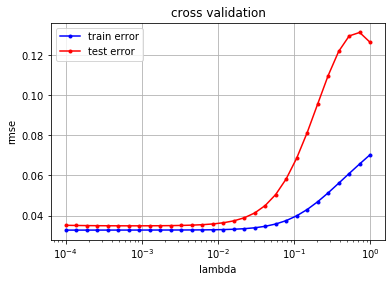

In [11]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for l in lambdas :
        arr_tr = []
        arr_te = []
        for i in range(k_fold) :
            loss_tr , loss_te = cross_validation(y,x,k_indices,k_fold,l,degree)
            arr_tr.append(loss_tr)
            arr_te.append(loss_te)
        rmse_tr.append(min(arr_tr)) #average
        rmse_te.append(min(arr_te)) #average
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [8]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.zeros((len(seeds), len(degrees)))
    rmse_te = np.zeros((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x = x[:,np.newaxis]
        trainX,testX,trainY,testY = split_data(x,y,ratio_train,seed=seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree,degree in enumerate(degrees):
            _trainX = build_poly(trainX, degree) 
            _testX  = build_poly(testX, degree)
            
            _ , w = least_squares(trainY, _trainX)
            loss_tr = compute_mse(trainY,_trainX,w)
            loss_te = compute_mse(testY,_testX,w)
            loss_tr = np.sqrt(2*loss_tr)
            loss_te = np.sqrt(2*loss_te)
            rmse_te[index_seed, index_degree] = loss_te
            rmse_tr[index_seed, index_degree] = loss_tr

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 62 and the array at index 1 has size 1